In [1]:
#Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
#Step 2: Load Dataset 
df = pd.read_csv('Movies.csv', encoding='latin1')  
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [13]:
#Step 3: Explore the Data
df.info()
df.describe()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [39]:
#Step 4: Clean the Year Column
# Extract 4-digit year from (2019) style
df['Year'] = df['Year'].astype(str).str.extract(r'(\d{4})').astype(int)


In [41]:
#step 5:Combine Actor Columns (optional)
# Combine actor names
df['Actors'] = df['Actor 1'] + ', ' + df['Actor 2'] + ', ' + df['Actor 3']


In [47]:
print(df.columns.tolist())


['Name', 'Year', 'Duration', 'Rating', 'Votes', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre_Action, Adventure', 'Genre_Action, Adventure, Biography', 'Genre_Action, Adventure, Comedy', 'Genre_Action, Adventure, Crime', 'Genre_Action, Adventure, Drama', 'Genre_Action, Adventure, Family', 'Genre_Action, Adventure, Fantasy', 'Genre_Action, Adventure, History', 'Genre_Action, Adventure, Horror', 'Genre_Action, Adventure, Musical', 'Genre_Action, Adventure, Mystery', 'Genre_Action, Adventure, Romance', 'Genre_Action, Adventure, Sci-Fi', 'Genre_Action, Adventure, Thriller', 'Genre_Action, Biography, Crime', 'Genre_Action, Biography, Drama', 'Genre_Action, Comedy', 'Genre_Action, Comedy, Crime', 'Genre_Action, Comedy, Drama', 'Genre_Action, Comedy, Fantasy', 'Genre_Action, Comedy, Horror', 'Genre_Action, Comedy, Musical', 'Genre_Action, Comedy, Mystery', 'Genre_Action, Comedy, Romance', 'Genre_Action, Comedy, Thriller', 'Genre_Action, Comedy, War', 'Genre_Action, Crime', 'Genre_Action, Crime, Dra

In [69]:
# Clean 'Votes' column
df.loc[:, 'Votes'] = df['Votes'].astype(str).str.replace(',', '', regex=False)
df.loc[:, 'Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

# Clean 'Duration' column
df.loc[:, 'Duration'] = (
    df['Duration']
    .astype(str)
    .str.replace('min', '', regex=False)
    .str.strip()
    .astype(float)  # explicit float cast here
)


In [71]:
#Split Data into Features (X) and Target (y)Assuming your target column is 'Rating':
X = df.drop('Rating', axis=1)
y = df['Rating']


In [73]:
#Train-Test Split
from sklearn.model_selection import train_test_split

# Split: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [83]:
df = df.copy()  # ← Add this before any modification to silence warnings

df.drop(columns=['Title', 'Name'], errors='ignore', inplace=True)
df.drop(columns=['Actors'], errors='ignore', inplace=True)


In [85]:
X = df.drop('Rating', axis=1)
y = df['Rating']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [87]:
#Make Predictions & Evaluate the Model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared Score (R²): {r2:.2f}")


Mean Absolute Error (MAE): 1.03
Mean Squared Error (MSE): 1.72
R-squared Score (R²): 0.07


In [89]:
#Compare Predictions vs Actual
results = pd.DataFrame({'Actual Rating': y_test, 'Predicted Rating': y_pred})
print(results.head(10))  # Show first 10 results


       Actual Rating  Predicted Rating
3563             5.7          7.087965
2023             6.3          6.140545
9526             7.9          7.847969
40               4.8          4.483274
1876             5.6          6.763995
15065            3.9          4.445564
14709            8.0          5.804015
6308             7.5          5.946679
12695            7.7          5.565426
9967             5.4          5.858961


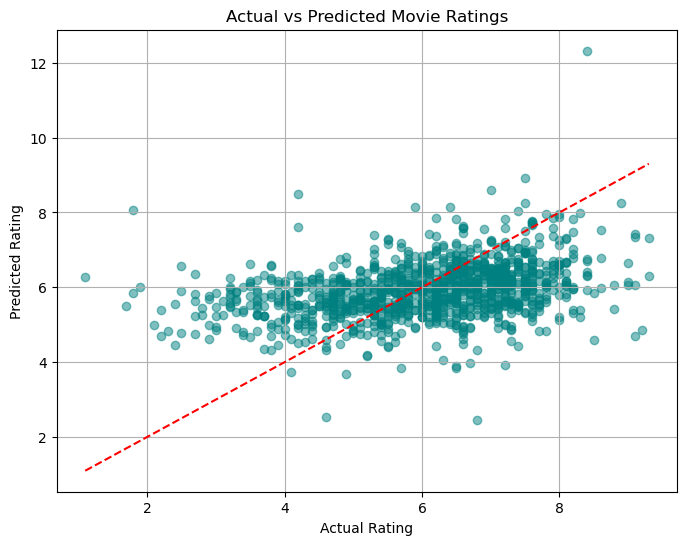

In [91]:
#Visualize Actual vs Predicted Ratings
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs Predicted Movie Ratings')
plt.grid(True)
plt.show()


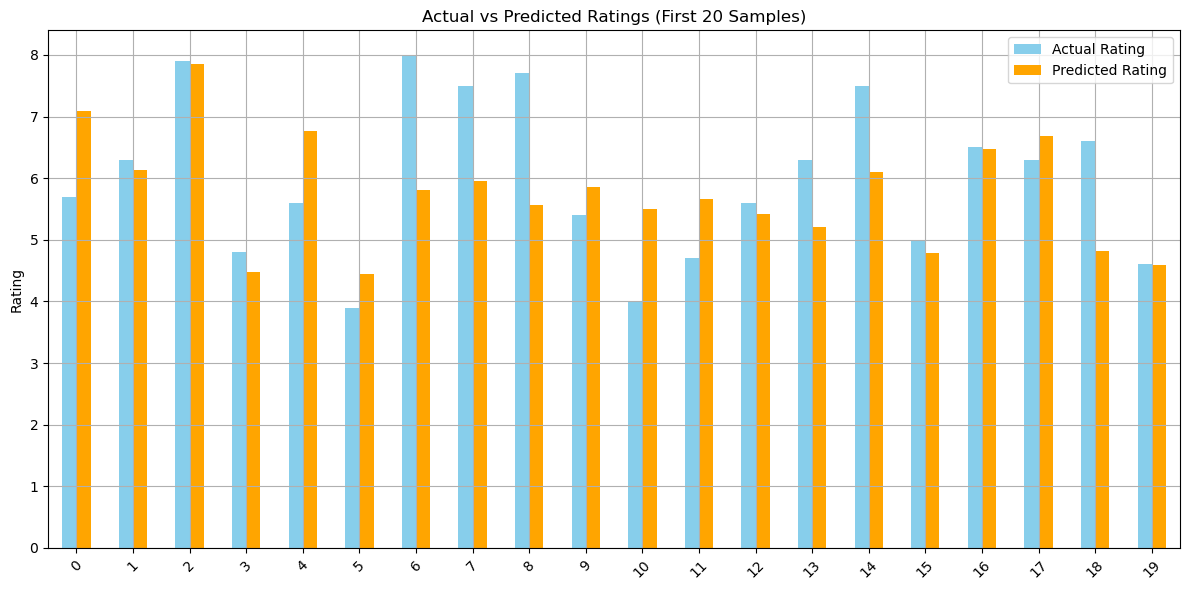

In [93]:
#Bar Plot for First 20 Movies
results = pd.DataFrame({'Actual Rating': y_test, 'Predicted Rating': y_pred})
results = results.reset_index(drop=True)

results[:20].plot(kind='bar', figsize=(12,6), color=['skyblue', 'orange'])
plt.title('Actual vs Predicted Ratings (First 20 Samples)')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [97]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculate MSE
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)  # This gives you RMSE
rf_r2 = r2_score(y_test, rf_pred)

print(f"Random Forest RMSE: {rf_rmse:.2f}")
print(f"Random Forest R² Score: {rf_r2:.2f}")


Random Forest RMSE: 1.16
Random Forest R² Score: 0.28


In [101]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)


LinearRegression()

In [103]:
lin_pred = lin_model.predict(X_test)


In [105]:
#Evaluate Linear Regression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

lin_mse = mean_squared_error(y_test, lin_pred)
lin_rmse = np.sqrt(lin_mse)
lin_r2 = r2_score(y_test, lin_pred)

print(f"Linear Regression RMSE: {lin_rmse:.2f}")
print(f"Linear Regression R² Score: {lin_r2:.2f}")


Linear Regression RMSE: 1.31
Linear Regression R² Score: 0.07


In [109]:
#Full Comparison 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Train Linear Regression
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
lin_pred = lin_model.predict(X_test)

# Evaluate Linear Regression
lin_mse = mean_squared_error(y_test, lin_pred)
lin_rmse = np.sqrt(lin_mse)
lin_r2 = r2_score(y_test, lin_pred)

print("=== Linear Regression ===")
print(f"RMSE: {lin_rmse:.2f}")
print(f"R² Score: {lin_r2:.2f}")

# Train Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Evaluate Random Forest
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_pred)

print("\n=== Random Forest Regressor ===")
print(f"RMSE: {rf_rmse:.2f}")
print(f"R² Score: {rf_r2:.2f}")



=== Linear Regression ===
RMSE: 1.31
R² Score: 0.07

=== Random Forest Regressor ===
RMSE: 1.16
R² Score: 0.28


In [111]:
# Save predictions to a CSV file
results_df = pd.DataFrame({
    'Actual Rating': y_test,
    'Predicted Rating': rf_pred
})

results_df.to_csv("movie_rating_predictions.csv", index=False)

print("Predictions saved to 'movie_rating_predictions.csv'")


Predictions saved to 'movie_rating_predictions.csv'


In [113]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# 1. Evaluate Linear Regression
lin_pred = lin_model.predict(X_test)
lin_mse = mean_squared_error(y_test, lin_pred)
lin_rmse = np.sqrt(lin_mse)
lin_r2 = r2_score(y_test, lin_pred)

print("🔹 Linear Regression Performance:")
print(f"RMSE: {lin_rmse:.2f}")
print(f"R² Score: {lin_r2:.2f}\n")

# 2. Evaluate Random Forest
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_pred)

print("🔹 Random Forest Performance:")
print(f"RMSE: {rf_rmse:.2f}")
print(f"R² Score: {rf_r2:.2f}\n")

# 3. Save Predictions to CSV
results_df = pd.DataFrame({
    'Actual Rating': y_test,
    'Linear Regression Prediction': lin_pred,
    'Random Forest Prediction': rf_pred
})

results_df.to_csv("movie_rating_predictions.csv", index=False)
print("✅ Predictions saved to 'movie_rating_predictions.csv'")

# 4. Comment on model performance
if rf_rmse < lin_rmse and rf_r2 > lin_r2:
    print("\n✅ Random Forest performed better than Linear Regression based on RMSE and R² Score.")
else:
    print("\nℹ️ Linear Regression performed better or comparable to Random Forest.")


🔹 Linear Regression Performance:
RMSE: 1.31
R² Score: 0.07

🔹 Random Forest Performance:
RMSE: 1.16
R² Score: 0.28

✅ Predictions saved to 'movie_rating_predictions.csv'

✅ Random Forest performed better than Linear Regression based on RMSE and R² Score.


In [119]:
# Define the list of columns to add
columns_to_add = ['Genre_Action', 'Genre_Comedy', 'Director_Spielberg', 'Actor_Tom_Hanks']

# Create a dictionary of all new columns to add with 0 as default values
new_columns = {col: [0]*len(sample_df) for col in columns_to_add}

# Create a DataFrame with these new columns
new_cols_df = pd.DataFrame(new_columns)

# Concatenate the original DataFrame with the new columns
sample_df = pd.concat([sample_df, new_cols_df], axis=1)


In [121]:
# Set relevant one-hot encoded columns to 1 for this sample
sample_df.at[0, 'Genre_Action'] = 1
sample_df.at[0, 'Director_Spielberg'] = 1
sample_df.at[0, 'Actor_Tom_Hanks'] = 1


In [123]:
# Predict the rating
predicted_rating = model.predict(sample_df)

# Show the result
print("Predicted Rating:", predicted_rating[0])


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Actor_Tom_Hanks
- Director_Spielberg
- Genre_Action


In [127]:
X_train = df.drop('Rating', axis=1)
trained_columns = X_train.columns.tolist()


In [131]:
# Optional: Save to file for later use
import pickle
with open("trained_columns.pkl", "wb") as f:
    pickle.dump(trained_columns, f)


In [133]:
trained_columns = X_train.columns.tolist()

# Save trained feature columns to a file (only needs to be done once)
import pickle
with open("trained_columns.pkl", "wb") as f:
    pickle.dump(trained_columns, f)


In [143]:
import pandas as pd

# Try with ISO-8859-1
movie_df = pd.read_csv("Movies.csv", encoding='ISO-8859-1')


In [145]:
pip install chardet

Note: you may need to restart the kernel to use updated packages.


In [147]:
import chardet

# Detect encoding
with open("Movies.csv", 'rb') as f:
    result = chardet.detect(f.read(100000))  # Read first 100KB
    print(result)

# Use detected encoding
movie_df = pd.read_csv("Movies.csv", encoding=result['encoding'])


{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [151]:
import pandas as pd

movie_df = pd.read_csv("Movies.csv", encoding='ISO-8859-1')


In [153]:
X = movie_df.drop('Rating', axis=1)
y = movie_df['Rating']

# Proceed with preprocessing or model training


In [155]:
import pandas as pd

# Load your movie dataset
movie_df = pd.read_csv("Movies.csv", encoding='ISO-8859-1')


In [157]:
# Separate features and target
X = movie_df.drop('Rating', axis=1)
y = movie_df['Rating']


In [159]:
# One-hot encoding of categorical columns
X_encoded = pd.get_dummies(X)


In [161]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [167]:
import pandas as pd

# Load data
movie_df = pd.read_csv("Movies.csv", encoding='ISO-8859-1')

# Drop rows with missing target
movie_df = movie_df.dropna(subset=['Rating'])

# Separate features and target
X = movie_df.drop('Rating', axis=1)
y = movie_df['Rating']


In [171]:
import pandas as pd

# Use correct encoding as detected
movie_df = pd.read_csv("Movies.csv", encoding='ISO-8859-1')

# Show first few rows and columns
print(movie_df.columns.tolist())
print(movie_df.head())


['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

        

In [177]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import pickle

# Load CSV with encoding fix
movie_df = pd.read_csv("Movies.csv", encoding="ISO-8859-1")

# Extract numeric year from 'Year' column (e.g., from "(2019)")
movie_df['Year'] = movie_df['Year'].str.extract(r'(\d{4})')
movie_df['Year'] = pd.to_numeric(movie_df['Year'], errors='coerce')

# Clean 'Votes' column: remove commas and convert to numeric
movie_df['Votes'] = movie_df['Votes'].astype(str).str.replace(',', '', regex=False)
movie_df['Votes'] = pd.to_numeric(movie_df['Votes'], errors='coerce')

# Drop unusable columns
movie_df = movie_df.drop(['Name', 'Duration'], axis=1)

# Drop rows with missing essential values
movie_df = movie_df.dropna(subset=['Rating', 'Year', 'Votes', 'Genre', 'Director', 'Actor 1'])

# Create a unified 'Actor' column from 'Actor 1'
movie_df['Actor'] = movie_df['Actor 1']

# Drop the original actor columns
movie_df = movie_df.drop(['Actor 1', 'Actor 2', 'Actor 3'], axis=1)

# One-hot encode the categorical columns
df_encoded = pd.get_dummies(movie_df, columns=['Genre', 'Director', 'Actor'], drop_first=True)

# Split into features and target
X = df_encoded.drop('Rating', axis=1)
y = df_encoded['Rating']

# Train the model
model = LinearRegression()
model.fit(X, y)

# Save the trained model
with open("trained_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Save the list of trained column names for future predictions
trained_columns = X.columns.tolist()
with open("trained_columns.pkl", "wb") as f:
    pickle.dump(trained_columns, f)

print("✅ Model and column list saved successfully.")


✅ Model and column list saved successfully.


C:\Users\pallavi\AppData\Local\Temp\ipykernel_18116\1531184751.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sample_encoded[col] = 0
C:\Users\pallavi\AppData\Local\Temp\ipykernel_18116\1531184751.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sample_encoded[col] = 0
C:\Users\pallavi\AppData\Local\Temp\ipykernel_18116\1531184751.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once 

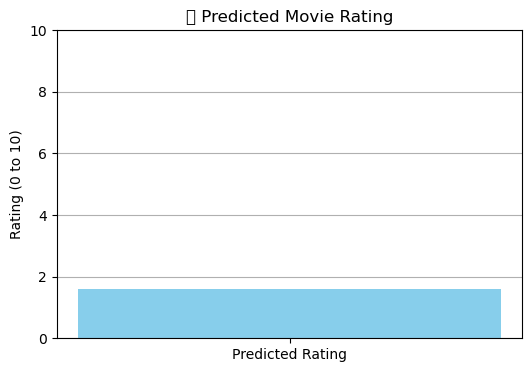

In [181]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt

# Step 1: Load model and trained columns
with open("trained_model.pkl", "rb") as f:
    model = pickle.load(f)

with open("trained_columns.pkl", "rb") as f:
    trained_columns = pickle.load(f)

# Step 2: Create new movie sample
sample = {
    'Year': [2024],
    'Votes': [1500],
    'Genre': ['Drama'],
    'Director': ['Steven Spielberg'],
    'Actor': ['Tom Hanks']
}
sample_df = pd.DataFrame(sample)

# Step 3: One-hot encode like training data
sample_encoded = pd.get_dummies(sample_df, columns=['Genre', 'Director', 'Actor'], drop_first=True)

# Step 4: Add missing columns
for col in trained_columns:
    if col not in sample_encoded.columns:
        sample_encoded[col] = 0

# Step 5: Reorder columns
sample_encoded = sample_encoded[trained_columns]

# Step 6: Predict rating
predicted_rating = model.predict(sample_encoded)[0]

# Step 7: Show result using a bar graph
plt.figure(figsize=(6,4))
plt.bar(['Predicted Rating'], [predicted_rating], color='skyblue')
plt.ylim(0, 10)
plt.ylabel("Rating (0 to 10)")
plt.title("🎬 Predicted Movie Rating")
plt.grid(axis='y')
plt.show()


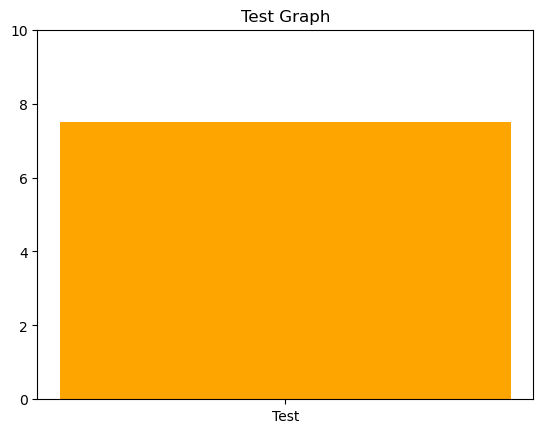

In [185]:
import matplotlib.pyplot as plt

%matplotlib inline  

plt.bar(["Test"], [7.5], color="orange")
plt.ylim(0, 10)
plt.title("Test Graph")
plt.show()


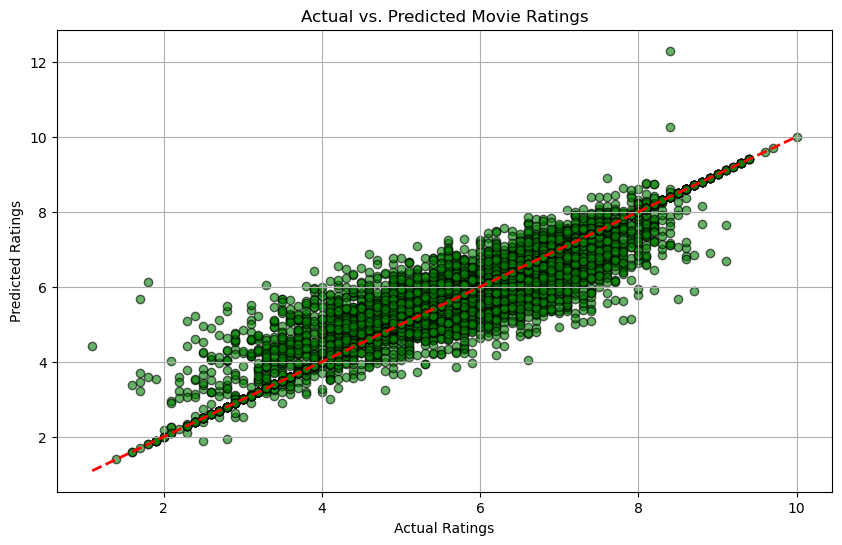

Root Mean Squared Error (RMSE): 0.55


In [187]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# Predict the ratings using your trained model
y_pred = model.predict(X)

# Plot actual vs. predicted ratings
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, color='green', alpha=0.6, edgecolor='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  # reference line
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs. Predicted Movie Ratings')
plt.grid(True)
plt.show()

# Optional: Show model accuracy with RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


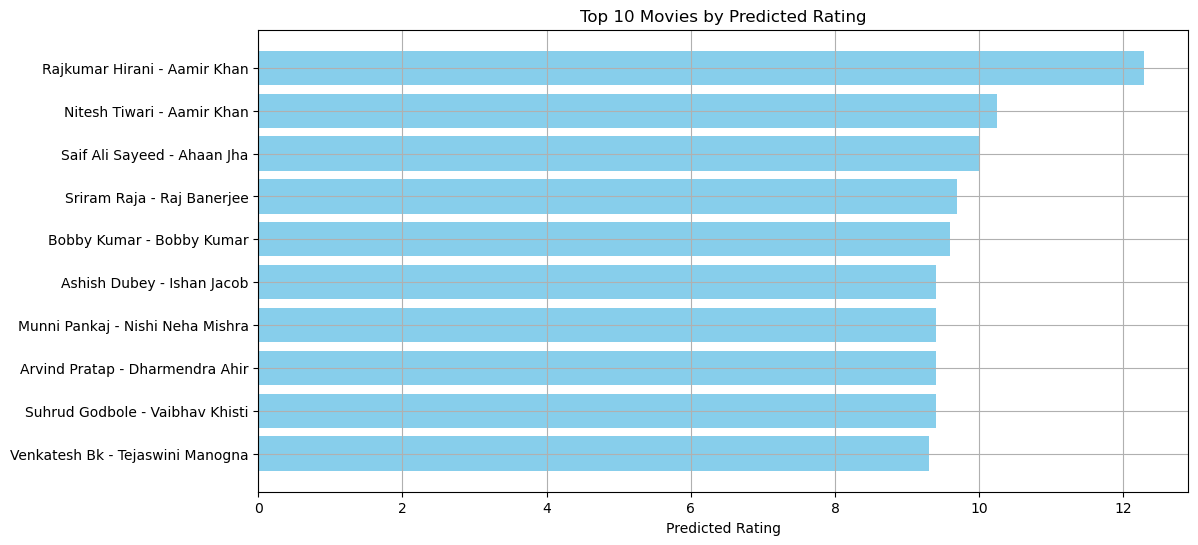

In [189]:
#Bar Chart: Top 10 Movies by Predicted Rating
# Combine actual ratings and predictions for comparison
results_df = movie_df.copy()
results_df['Predicted Rating'] = y_pred

# Sort by predicted rating
top10 = results_df.sort_values(by='Predicted Rating', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
plt.barh(top10['Director'] + " - " + top10['Actor'], top10['Predicted Rating'], color='skyblue')
plt.xlabel('Predicted Rating')
plt.title('Top 10 Movies by Predicted Rating')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()


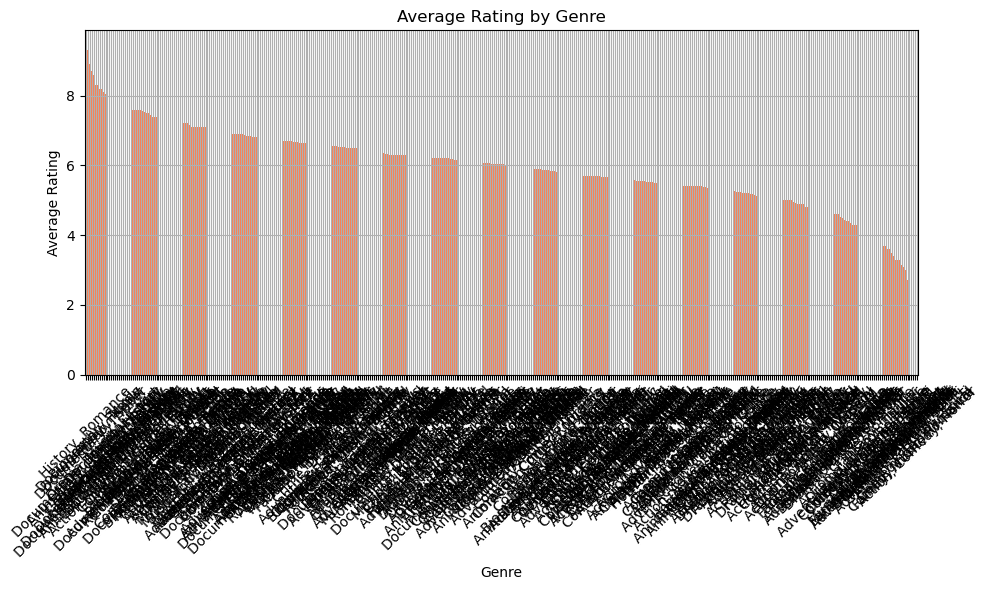

In [193]:
#Genre-wise Average Rating (Bar Chart)
# Group by Genre and calculate average rating
genre_avg = movie_df.groupby('Genre')['Rating'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
genre_avg.plot(kind='bar', color='coral')
plt.ylabel('Average Rating')
plt.title('Average Rating by Genre')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig("genre_rating_bar_chart.png")
plt.show()


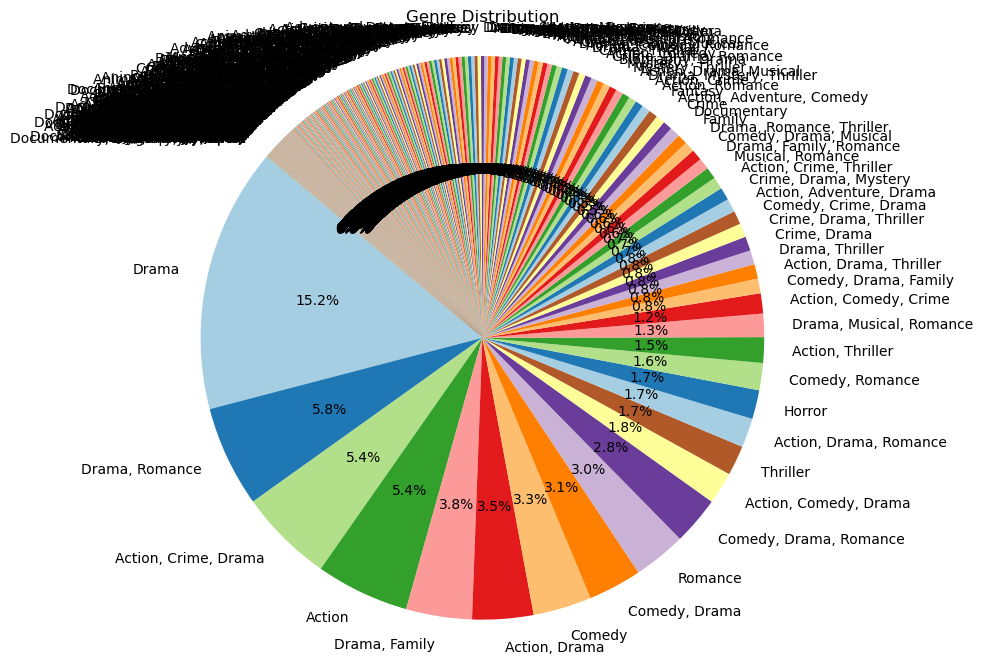

In [195]:
# Pie Chart: Genre Distribution
# Count of movies per genre
genre_counts = movie_df['Genre'].value_counts()

# Plot
plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Genre Distribution')
plt.axis('equal')  # Keeps the pie chart circular
plt.show()


In [210]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import pickle

# Step 1: Load the CSV file with encoding fixed
movie_df = pd.read_csv("Movies.csv", encoding="ISO-8859-1")

# Step 2: Clean 'Votes' column (remove commas and convert to float)
movie_df['Votes'] = movie_df['Votes'].astype(str).str.replace(',', '', regex=False)
movie_df['Votes'] = pd.to_numeric(movie_df['Votes'], errors='coerce')

# Clean 'Gross' column if it exists
if 'Gross' in movie_df.columns:
    movie_df['Gross'] = movie_df['Gross'].astype(str)
    movie_df['Gross'] = movie_df['Gross'].str.replace(r'[\$,M]', '', regex=True)  # fixed warning
    movie_df['Gross'] = pd.to_numeric(movie_df['Gross'], errors='coerce')

# Extract numeric year
movie_df['Year'] = movie_df['Year'].astype(str).str.extract(r'(\d{4})')  # fixed warning
movie_df['Year'] = pd.to_numeric(movie_df['Year'], errors='coerce')


# Step 5: Drop unwanted columns
movie_df = movie_df.drop(['Name', 'Duration'], axis=1, errors='ignore')

# Step 6: Drop rows with missing important values
movie_df = movie_df.dropna(subset=['Rating', 'Year', 'Votes', 'Genre', 'Director', 'Actor 1'])

# Step 7: Create unified 'Actor' column using 'Actor 1'
movie_df['Actor'] = movie_df['Actor 1']

# Step 8: Drop the original actor columns
movie_df.drop(['Actor 1', 'Actor 2', 'Actor 3'], axis=1, inplace=True, errors='ignore')

# Step 9: One-hot encode categorical columns
df_encoded = pd.get_dummies(movie_df, columns=['Genre', 'Director', 'Actor'], drop_first=True)

# Step 10: Separate features and target
X = df_encoded.drop('Rating', axis=1)
y = df_encoded['Rating']

# Step 11: Train the model
model = LinearRegression()
model.fit(X, y)

# Step 12: Save the model
with open("trained_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Step 13: Save the column names for prediction
with open("trained_columns.pkl", "wb") as f:
    pickle.dump(X.columns.tolist(), f)

print("✅ Model trained and saved successfully.")


✅ Model trained and saved successfully.


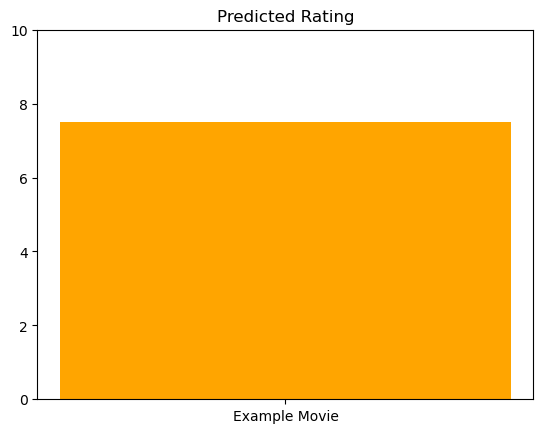

In [214]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.bar(["Example Movie"], [7.5], color="orange")
plt.title("Predicted Rating")
plt.ylim(0, 10)
plt.show()
